In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, exists
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/home/sungbeenpark/anaconda3/envs/sampark/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
GA = mydef.GA()

OS : linux
Google Drive is detected!
Git directory is detected!


---

## Check replications

### 1. Yera and Yunha's correlation matrix

In [12]:
# data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')
# temp = join(data_dir,'network_analysis','20200213_MOerrts_AM1_corrmat.pkl')
# with open(temp,"rb") as file:
#     print(temp)
#     ## key: subj, run, (roiA, roiB)
#     ## value: Correlation Coefficient
#     corrmat = pickle.load(file)

/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/fmri_data/glm_results/MO_errts/network_analysis/20200213_MOerrts_AM1_corrmat.pkl


1. Visual areas and DMN Core

In [3]:
# GA.load_fan()

In [6]:
# ## DMN regions
# module_names = ['Core']

# for name in module_names:
#     temp = glob(join(GA.dir_dmn, name+'_*.nii'))
#     for path in temp:
#         fname = path.split('/')[-1].replace('.nii', '')
#         GA.roi_imgs[fname] = nilearn.image.load_img(path)

# ## yeo_17network == 1
# dt = pd.DataFrame()
# for nn in [1]:
#     dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
# for idx in dt.index:
#     nn = dt.loc[idx,'label']
#     region = dt.loc[idx,'region']
#     GA.roi_imgs[region] = GA.fan_imgs[str(nn)]

# GA.roi_imgs.keys()

dict_keys(['Core_PCC_r', 'Core_aMPFC_l', 'Core_PCC_l', 'Core_aMPFC_r', 'FuG_L_3_2', 'FuG_R_3_2', 'MVOcC_L_5_1', 'MVOcC_R_5_1', 'MVOcC_L_5_3', 'MVOcC_R_5_3', 'MVOcC_R_5_4', 'LOcC_L_4_1', 'LOcC_R_4_1', 'LOcC_L_4_3', 'LOcC_R_4_3', 'LOcC_L_4_4', 'LOcC_R_4_4', 'LOcC_L_2_2'])

2. Calculating task-related networks

In [8]:
# subj = '01'
# visit = 'early'
# run = 1

# GA.make_df_functional_correl_from_tsmean(subj, visit, run, GA.roi_imgs.keys())

subj  visit     mapping run         roiA          roiB  Pearson_r  \
0     01  early    practice   1   Core_PCC_l    Core_PCC_l   1.000000   
1     01  early    practice   1   Core_PCC_l    Core_PCC_r   0.898462   
2     01  early    practice   1   Core_PCC_l  Core_aMPFC_l   0.694388   
3     01  early    practice   1   Core_PCC_l  Core_aMPFC_r   0.574191   
4     01  early    practice   1   Core_PCC_l     FuG_L_3_2   0.434554   
..   ...    ...         ...  ..          ...           ...        ...   
319   01  early  unpractice   6  MVOcC_R_5_4   MVOcC_L_5_1   0.825047   
320   01  early  unpractice   6  MVOcC_R_5_4   MVOcC_L_5_3   0.607123   
321   01  early  unpractice   6  MVOcC_R_5_4   MVOcC_R_5_1   0.755544   
322   01  early  unpractice   6  MVOcC_R_5_4   MVOcC_R_5_3   0.789492   
323   01  early  unpractice   6  MVOcC_R_5_4   MVOcC_R_5_4   1.000000   

              pval  
0     0.000000e+00  
1     0.000000e+00  
2    1.579097e-158  
3     3.919469e-97  
4     1.058436e-51  
..             ...  
319  1.823948e-273  
320  2.321859e-111  
321  3.489742e-203  
322  3.600201e-234  
323   0.000000e+00  

[1944 rows x 8 columns]

3. Comparing them

In [30]:
# gg = 'GA' if visit=='early' else ('GB' if visit=='late' else None)
# mapping = 'practice' if run <= 3 else('unpractice' if run > 3 else 'invalid')

# coef_YY = []
# coef = np.array(GA.df_functional_correl.Pearson_r)

# sorted_rois = sorted(GA.roi_imgs.keys())
# for roiA in sorted_rois:
#     for roiB in sorted_rois:
#         coef_YY.append(corrmat[gg+subj,run,(roiA,roiB)])
# coef_YY = np.array(coef_YY)

In [1]:
# coef - coef_YY

4. $\textbf{Conclusion}$: '20200213_MOerrts_AM1_corrmat.pkl' == My correlation matrix, 'GA.df_functional_correl'

### 2. Yera and Yunha's a recruitment file (Late - Early)

In [15]:
data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')

1. A recruitment file (Late - Early)

In [16]:
with open(join(data_dir,'MO_errts_AM1_recruitment_prac_late-early.pkl'),'rb') as fr:
    ## key: mapping, ()
    recruitment = pickle.load(file=fr)

2. transposing the recruitment file to DataFrame

In [21]:
temp = pd.read_csv(join(data_dir,'conn_comb.tsv'), index_col=0)
temp

subj    prac     behav   rcr_dmn  rcr_core  rcr_dmsub  rcr_core_dmsub  \
1   GA01    prac  0.417419 -0.103570 -0.118566  -0.062610       -0.106172   
2   GA02    prac  0.360081  0.013481 -0.028470   0.035389       -0.007518   
3   GA05    prac  0.346667  0.048872  0.088557   0.015633        0.039004   
4   GA07    prac  0.412720 -0.026085  0.042960  -0.049909       -0.018980   
5   GA08    prac  0.212870 -0.171727 -0.063840  -0.094837       -0.145378   
6   GA11    prac  0.475243 -0.146506 -0.033110  -0.118157       -0.121286   
7   GA12    prac  0.345544 -0.021644  0.053325  -0.040779       -0.053949   
8   GA13    prac  0.329375  0.177759 -0.043590   0.217391        0.104026   
9   GA14    prac  0.545197 -0.050815 -0.050410  -0.046664       -0.068760   
10  GA15    prac  0.419329 -0.059917  0.041401  -0.047932       -0.030137   
11  GA18    prac  0.219363  0.106952  0.069664   0.128296        0.067345   
12  GA19    prac  0.317616  0.083942 -0.008891   0.055331        0.043932   
13  GA20    prac  0.264769  0.041407  0.001311   0.196839        0.129739   
14  GA21    prac  0.539016 -0.145771 -0.020283  -0.063453       -0.082603   
15  GA23    prac  0.164086  0.040723  0.009799  -0.003798        0.025211   
16  GA26    prac  0.526053 -0.080844 -0.041748  -0.044188       -0.058443   
17  GA27    prac  0.292234 -0.048981 -0.067392  -0.096023       -0.090555   
18  GA28    prac  0.297141 -0.041459 -0.061397  -0.054129       -0.047637   
19  GA29    prac  0.474977 -0.014001 -0.126911  -0.019003       -0.079324   
20  GA30    prac  0.150625  0.115438  0.066644   0.090975        0.097237   
21  GA31    prac  0.221759 -0.005987 -0.021332   0.106666        0.052082   
22  GA32    prac  0.165706  0.062567 -0.119389   0.068448       -0.040191   
23  GA33    prac  0.687083 -0.218612 -0.040016  -0.071809       -0.135297   
24  GA34    prac  0.402211 -0.126810 -0.055344   0.007222       -0.106103   
25  GA35    prac  0.373993  0.079778 -0.022553  -0.036668       -0.049566   
26  GA36    prac  0.411678 -0.052058  0.012483   0.046057        0.001477   
27  GA37    prac  0.529896 -0.122101 -0.096190  -0.034228       -0.115329   
28  GA38    prac  0.473600 -0.053711  0.022446  -0.002072       -0.011571   
29  GA42    prac  0.413530 -0.134208 -0.069553  -0.133253       -0.138904   
30  GA44    prac  0.442512  0.000639  0.084937   0.017638        0.012794   
31  GB01  unprac  0.315178 -0.162141 -0.101671  -0.102299       -0.129113   
32  GB02  unprac  0.236312  0.028168 -0.000851   0.051833        0.041460   
33  GB05  unprac  0.099656 -0.058657  0.003702  -0.047109       -0.016691   
34  GB07  unprac -0.015063 -0.044850 -0.020155  -0.094247       -0.070046   
35  GB08  unprac  0.087010 -0.225350 -0.135529  -0.214697       -0.205204   
36  GB11  unprac  0.018305  0.064152  0.065766   0.034694        0.060915   
37  GB12  unprac -0.103585  0.057534  0.115833   0.008153        0.032554   
38  GB13  unprac -0.017595  0.043594  0.010118   0.036251        0.033939   
39  GB14  unprac  0.248900  0.057416  0.027746   0.051729        0.033515   
40  GB15  unprac -0.184135 -0.073017 -0.012229  -0.079891       -0.076853   
41  GB18  unprac  0.218190 -0.114353 -0.045507  -0.008358       -0.079641   
42  GB19  unprac  0.028099  0.056507  0.007663   0.010002        0.016769   
43  GB20  unprac -0.157297  0.141185  0.081653   0.101243        0.128053   
44  GB21  unprac  0.096128  0.005060  0.097100  -0.004809        0.011450   
45  GB23  unprac  0.118465  0.074658  0.031241   0.072300        0.068585   
46  GB26  unprac  0.227835 -0.022539 -0.021887   0.065150        0.026078   
47  GB27  unprac -0.026552 -0.203647 -0.136144  -0.067441       -0.101343   
48  GB28  unprac  0.094616  0.027515  0.010071   0.063555        0.041227   
49  GB29  unprac  0.070767 -0.096554 -0.013597  -0.041798       -0.058352   
50  GB30  unprac  0.230733  0.060630  0.050947   0.027110        0.030071   
51  GB31  unprac  0.127125 -0.049950 -0.014481  -0.051660       -0.071165   


In [22]:
recruitment['prac', ('visual', 'core')]

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

In [23]:
np.array(temp['intg_vis_core'][:30])

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

3. plot

In [24]:
X = temp['intg_vis_core'][:30]
Y = np.array(temp.behav[:30])

Text(0.5, 1.0, 'r=-0.5492 (p=0.002)')

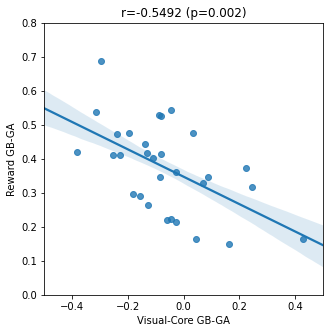

In [25]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=68, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [26]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-2.0615330330018002, pvalue=0.024158324680980958)

---

## 0. ROIs

- Visual areas, DMN Core, and motor system

In [3]:
dir_root = '/home/sungbeenpark/GA'
stat = 'GLM.MO'

In [4]:
dir_tsmean = join(dir_root, stat, 'tsmean')

rois = np.load(join(dir_tsmean,'rois.npy'))
rois

array(['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r',
       'MTLsub_HF_l', 'MTLsub_HF_r', 'MTLsub_PHC_l', 'MTLsub_PHC_r',
       'MTLsub_Rsp_l', 'MTLsub_Rsp_r', 'MTLsub_pIPL_l', 'MTLsub_pIPL_r',
       'MTLsub_vMPFC', 'dMsub_LTC_l', 'dMsub_LTC_r', 'dMsub_TPJ_l',
       'dMsub_TPJ_r', 'dMsub_TempP_l_temp', 'dMsub_TempP_r_temp',
       'dMsub_dMPFC', 'fan105', 'fan106', 'fan189', 'fan190', 'fan193',
       'fan194', 'fan196', 'fan199', 'fan200', 'fan203', 'fan204',
       'fan205', 'fan206', 'fan209', 'n200_c1_L_Postcentral',
       'n200_c2_R_CerebellumIV-V', 'n200_c3_R_Postcentral',
       'n200_c4_L_Putamen', 'n200_c5_R_SMA', 'n200_c6_R_CerebellumVIIIb',
       'n200_c7_L_Thalamus'], dtype='<U30')

In [5]:
# GA.load_fan()

In [6]:
# rois_ = {}

# ## DMN regions
# modules = ['Core', 'dMsub', 'MTLsub']

# for module in modules:
#     rois_[module] = []
#     temp = glob(join(GA.dir_mask, 'DMN', module+'_*.nii'))
#     for path in temp:
#         region = path.split('/')[-1].replace('.nii', '')
#         rois_[module].append(region)
#         GA.roi_imgs[region] = nilearn.image.load_img(path)

# ## yeo_17network == 1
# module = 'yeo_17network'

# rois_[module] = []

# dt = pd.DataFrame()
# for nn in [1]:
#     dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
# for idx in dt.index:
#     nn = dt.loc[idx,'label']
#     region = dt.loc[idx,'region']
#     GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
#     rois_[module].append(region)

# ## localizer
# module = 'localizer'

# rois_[module] = []

# temp = {}
# path_list = sorted(glob(join(GA.dir_mask, module, 'n200_*.nii')))
# for path in path_list:
#     roi = path.split('/')[-1].replace('_mask.nii', '')
#     temp[roi] = nilearn.image.load_img(path)
    
# list_key = ['n200_c1_L_Postcentral'
#             , 'n200_c2_R_CerebellumIV-V'
#             , 'n200_c3_R_Postcentral'
#             , 'n200_c4_L_Putamen'
#             , 'n200_c5_R_SMA'
#             , 'n200_c6_R_CerebellumVIIIb'
#             , 'n200_c7_L_Thalamus']
# for key in list_key:
#     GA.roi_imgs[key] = temp[key]
#     rois_[module].append(key)

- Fan280

In [6]:
# GA.load_fan()

Google Drive is detected!


In [7]:
# ## make full mask
# fname = join(GA.dir_mask,'fan280','fan.roi.GA.001.nii.gz')
# fmask = nilearn.image.load_img(fname)
# temp = nilearn.image.math_img(img1=fmask, formula='img1 * 0.')
# for region, img in GA.fan_imgs.items():
#     temp = nilearn.image.math_img(img1=temp, img2=img, formula='img1 + img2')
# global_mask = temp

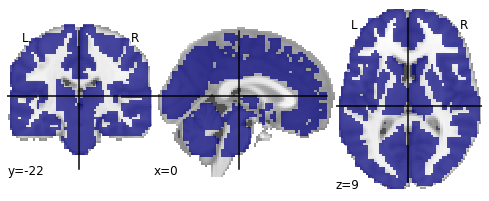

In [9]:
# fig = nilearn.plotting.plot_roi(global_mask)

## 1. Calculating Functional Correlation

- Calculating a correlation by tsmean.bp_demean.errts (run once), then save the result.

In [5]:
runs = ['r%02d'%(i+1) for i in range(6)]

list_ = []
for stage in GA.list_stage:
    for subj in GA.list_subj:
        for run in runs:
            for i, a in enumerate(rois):
                for b in rois[i+1:]:
                    list_.append([stage, subj, run, a, b])
list_ = np.array(list_)
list_.shape

(590400, 5)

In [6]:
lines = []
previous = {}
previous['stage'] = ''
previous['subj'] = ''
previous['run'] = ''
for stage, subj, run, roia, roib in tqdm(list_):
    gg = 'GA' if 'early' in stage else ('GB' if 'late' in stage else 'invalid')
    
    if previous['stage']!=stage or previous['subj']!=subj or previous['run']!=run:
        whole_brain = GA.load_tsmean_1D(
            join(dir_tsmean,'full_mask','tsmean.bp_demean.errts.%s.%s.%s.full_mask.1D'%(stat[-2:],gg+subj,run))
        )
        z = whole_brain / np.linalg.norm(whole_brain)
        M = np.outer(z, z)

    a = GA.load_tsmean_1D(
        join(dir_tsmean,roia,'tsmean.bp_demean.errts.%s.%s.%s.%s.1D'%(stat[-2:],gg+subj,run,roia))
    )
    b = GA.load_tsmean_1D(
        join(dir_tsmean,roib,'tsmean.bp_demean.errts.%s.%s.%s.%s.1D'%(stat[-2:],gg+subj,run,roib))
    )
    ## partial correlation
    a_prep = a - np.matmul(M, a)
    b_prep = b - np.matmul(M, b)
    
    r, p = scipy.stats.pearsonr(x=a_prep, y=b_prep)
    lines.append([subj, stage, run, roia, roib, r, p])
    
    ## renew
    previous['stage'] = stage
    previous['subj'] = subj
    previous['run'] = run

GA.df_functional_correlation = pd.DataFrame(lines, columns=GA.df_functional_correlation.columns)

100%|██████████| 590400/590400 [44:27<00:00, 221.34it/s] 


In [7]:
GA.save_as_pkl(data=GA.df_functional_correlation, path=dir_tsmean, suffix="df.functional_correlation.DMN-visual-localizer.tsmean.bp_demean.errts.%s"%(stat[-2:]))

- Calculating a correlation by bp_demean.errts (run once), then save the result.

In [5]:
# temp = GA.df_functional_correl
    
# for subj in GA.list_subj:
#     for visit in ['early','late']:
#         GA.make_df_functional_correl_from_errts(
#             subj, visit, 'practice'
#             , fdir='GLM.MO', fname='global_activity.bp_demean.errts.MO'
#             , rois=GA.roi_imgs
#         )
#         temp = temp.append(GA.df_functional_correl)
# GA.df_functional_correl = temp

In [17]:
# GA.save_pkl(GA.df_functional_correl, suffix="global_activity.bp_demean.errts.MO.functional_correlation.Yeo1-core")

## 2. Bring about the above results

In [5]:
temp = GA.show_pkl_list(path=join(dir_tsmean) , word="corr")
# temp = GA.show_pkl_list(path=dir_stats , word="corr")
temp

file  \
0  /home/sungbeenpark/GA/GLM.MO/tsmean/20211007.t...   
1  /home/sungbeenpark/GA/GLM.MO/tsmean/20211018.d...   

                                                name identity  
0  20211007.tsmean.MO.functional_correlation.visu...        a  
1  20211018.df.functional_correlation.DMN-visual-...        b

In [6]:
with open(list(temp.file)[1], 'rb') as fr:
    GA.df_functional_correlation = pickle.load(fr)
GA.df_functional_correlation

subj            stage  run                       roiA  \
0        01   early_practice  r01                 Core_PCC_l   
1        01   early_practice  r01                 Core_PCC_l   
2        01   early_practice  r01                 Core_PCC_l   
3        01   early_practice  r01                 Core_PCC_l   
4        01   early_practice  r01                 Core_PCC_l   
...     ...              ...  ...                        ...   
590395   44  late_unpractice  r06          n200_c4_L_Putamen   
590396   44  late_unpractice  r06          n200_c4_L_Putamen   
590397   44  late_unpractice  r06              n200_c5_R_SMA   
590398   44  late_unpractice  r06              n200_c5_R_SMA   
590399   44  late_unpractice  r06  n200_c6_R_CerebellumVIIIb   

                             roiB  Pearson_r           pval  
0                      Core_PCC_r   0.842966  7.985302e-297  
1                    Core_aMPFC_l   0.549550   1.692561e-87  
2                    Core_aMPFC_r   0.316758   5.756753e-27  
3                     MTLsub_HF_l   0.124716   3.468607e-05  
4                     MTLsub_HF_r  -0.009038   7.650350e-01  
...                           ...        ...            ...  
590395  n200_c6_R_CerebellumVIIIb   0.487200   2.094667e-66  
590396         n200_c7_L_Thalamus   0.441438   1.759156e-53  
590397  n200_c6_R_CerebellumVIIIb   0.631371  5.919937e-123  
590398         n200_c7_L_Thalamus   0.397843   7.038716e-43  
590399         n200_c7_L_Thalamus   0.420800   2.878442e-48  

[590400 rows x 7 columns]

In [7]:
sorted_rois = sorted(set(list(GA.df_functional_correlation.roiA.unique())+list(GA.df_functional_correlation.roiB.unique())))
print(len(sorted_rois), sorted_rois)

41 ['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r', 'MTLsub_HF_l', 'MTLsub_HF_r', 'MTLsub_PHC_l', 'MTLsub_PHC_r', 'MTLsub_Rsp_l', 'MTLsub_Rsp_r', 'MTLsub_pIPL_l', 'MTLsub_pIPL_r', 'MTLsub_vMPFC', 'dMsub_LTC_l', 'dMsub_LTC_r', 'dMsub_TPJ_l', 'dMsub_TPJ_r', 'dMsub_TempP_l_temp', 'dMsub_TempP_r_temp', 'dMsub_dMPFC', 'fan105', 'fan106', 'fan189', 'fan190', 'fan193', 'fan194', 'fan196', 'fan199', 'fan200', 'fan203', 'fan204', 'fan205', 'fan206', 'fan209', 'n200_c1_L_Postcentral', 'n200_c2_R_CerebellumIV-V', 'n200_c3_R_Postcentral', 'n200_c4_L_Putamen', 'n200_c5_R_SMA', 'n200_c6_R_CerebellumVIIIb', 'n200_c7_L_Thalamus']


In [8]:
rois_ = {}

# rois_['Core'] = sorted_rois[:4]
# rois_['MTLsub'] = sorted_rois[4:13]
# rois_['dMsub'] = sorted_rois[13:20]
rois_['DMN'] = sorted_rois[:20]
# rois_['task-negative'] = sorted_rois[:20]
rois_['Yeo1'] = sorted_rois[20:34]
rois_['localizer'] = sorted_rois[34:]
# rois_['task-positive'] = sorted_rois[20:]

rois_

{'DMN': ['Core_PCC_l',
  'Core_PCC_r',
  'Core_aMPFC_l',
  'Core_aMPFC_r',
  'MTLsub_HF_l',
  'MTLsub_HF_r',
  'MTLsub_PHC_l',
  'MTLsub_PHC_r',
  'MTLsub_Rsp_l',
  'MTLsub_Rsp_r',
  'MTLsub_pIPL_l',
  'MTLsub_pIPL_r',
  'MTLsub_vMPFC',
  'dMsub_LTC_l',
  'dMsub_LTC_r',
  'dMsub_TPJ_l',
  'dMsub_TPJ_r',
  'dMsub_TempP_l_temp',
  'dMsub_TempP_r_temp',
  'dMsub_dMPFC'],
 'Yeo1': ['fan105',
  'fan106',
  'fan189',
  'fan190',
  'fan193',
  'fan194',
  'fan196',
  'fan199',
  'fan200',
  'fan203',
  'fan204',
  'fan205',
  'fan206',
  'fan209'],
 'localizer': ['n200_c1_L_Postcentral',
  'n200_c2_R_CerebellumIV-V',
  'n200_c3_R_Postcentral',
  'n200_c4_L_Putamen',
  'n200_c5_R_SMA',
  'n200_c6_R_CerebellumVIIIb',
  'n200_c7_L_Thalamus']}

In [9]:
## A array representing group types
group = []
cnt = 1
for _, value in rois_.items():
    temp = np.ones(len(value)) * cnt
    group.append(temp)
    cnt += 1
group = np.concatenate(group).astype(int)
group

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3])

In [10]:
def comb_group(group):
    list_ = np.unique(group).astype(int)

    res = []
    for i, g1 in enumerate(list_):
        for g2 in list_[:i+1]:
            res.append(sorted([g1, g2]))
    return res

comb_group(group)

[[1, 1], [1, 2], [2, 2], [1, 3], [2, 3], [3, 3]]

## 3. Calculating Interaction Strength through Quick & Dirty Method

In [32]:
# ## The module 'GA.make_df_correlation_matrix' is work?
# subj = '01'
# stage = 'early_practice'

# print(subj, stage)
# GA.make_df_correlation_matrix(subj, stage, group=group)

01 early_practice


Core_PCC_l  Core_PCC_r  Core_aMPFC_l  Core_aMPFC_r  \
Core_PCC_l                   1.000000    0.898643      0.777967      0.685431   
Core_PCC_r                   0.898643    1.000000      0.752974      0.717681   
Core_aMPFC_l                 0.777967    0.752974      1.000000      0.920529   
Core_aMPFC_r                 0.685431    0.717681      0.920529      1.000000   
MTLsub_HF_l                  0.674686    0.686719      0.650271      0.670985   
MTLsub_HF_r                  0.693168    0.713513      0.635848      0.656130   
MTLsub_PHC_l                 0.725458    0.711653      0.676856      0.694810   
MTLsub_PHC_r                 0.734970    0.770523      0.685926      0.709773   
MTLsub_Rsp_l                 0.814228    0.798787      0.691847      0.676802   
MTLsub_Rsp_r                 0.762807    0.801623      0.648142      0.656290   
MTLsub_pIPL_l                0.796987    0.758953      0.821511      0.759928   
MTLsub_pIPL_r                0.542349    0.612835      0.474038      0.578695   
MTLsub_vMPFC                 0.627342    0.555513      0.638374      0.597076   
dMsub_LTC_l                  0.794299    0.737175      0.843631      0.783979   
dMsub_LTC_r                  0.727799    0.733182      0.814011      0.824002   
dMsub_TPJ_l                  0.689943    0.677656      0.815279      0.762609   
dMsub_TPJ_r                  0.734769    0.768652      0.791493      0.782049   
dMsub_TempP_l_temp           0.784301    0.751172      0.806135      0.771587   
dMsub_TempP_r_temp           0.762400    0.733999      0.766067      0.743639   
dMsub_dMPFC                  0.651966    0.633364      0.881819      0.879957   
fan105                       0.683412    0.714956      0.664739      0.707459   
fan106                       0.703290    0.725300      0.655473      0.685687   
fan189                       0.515908    0.589639      0.444754      0.478234   
fan190                       0.517181    0.559581      0.435955      0.442563   
fan193                       0.449154    0.520050      0.402807      0.438652   
fan194                       0.614439    0.591020      0.510210      0.503170   
fan196                       0.705967    0.725327      0.586020      0.588866   
fan199                       0.627500    0.639357      0.610551      0.677575   
fan200                       0.617217    0.625821      0.553238      0.594602   
fan203                       0.536481    0.555650      0.506640      0.523939   
fan204                       0.591227    0.568875      0.548998      0.552175   
fan205                       0.595250    0.630922      0.573232      0.631709   
fan206                       0.613671    0.608890      0.575296      0.591348   
fan209                       0.618886    0.661920      0.539075      0.601079   
n200_c1_L_Postcentral        0.563732    0.566415      0.602424      0.645217   
n200_c2_R_CerebellumIV-V     0.610748    0.616981      0.549991      0.603225   
n200_c3_R_Postcentral        0.514803    0.537084      0.503712      0.583399   
n200_c4_L_Putamen            0.552764    0.576598      0.622809      0.686109   
n200_c5_R_SMA                0.565765    0.583529      0.607715      0.676263   
n200_c6_R_CerebellumVIIIb    0.658855    0.646845      0.596892      0.635025   
n200_c7_L_Thalamus           0.595634    0.626360      0.616170      0.681909   

                           MTLsub_HF_l  MTLsub_HF_r  MTLsub_PHC_l  \
Core_PCC_l                    0.674686     0.693168      0.725458   
Core_PCC_r                    0.686719     0.713513      0.711653   
Core_aMPFC_l                  0.650271     0.635848      0.676856   
Core_aMPFC_r                  0.670985     0.656130      0.694810   
MTLsub_HF_l                   1.000000     0.754243      0.782951   
MTLsub_HF_r                   0.754243     1.000000      0.761640   
MTLsub_PHC_l                  0.782951     0.761640      1.000000   
MTLsub_PHC_r                  0.757609     0.820375      0.858977   
MTL

In [11]:
subjs = GA.df_functional_correlation.subj.unique()
subjs

array(['01', '02', '05', '07', '08', '11', '12', '13', '14', '15', '18',
       '19', '20', '21', '23', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '42', '44'], dtype=object)

In [12]:
## Initializing a result variable
res = {}
for [g1,g2] in comb_group(group):
    if g1!=g2:
        res[(g1,g2)] = []

tmp = {}
## Main calculation
for subj in subjs:
    corrmat = {}
    I = {}

    ## Matrix implementation & initializing an interaction variable
    for stage in ['early_practice', 'late_practice']:
        corrmat[stage] = GA.make_df_correlation_matrix(subj, stage, group=group)
        for [g1,g2] in comb_group(group):
            I[stage, (g1,g2)] = []
    ## Inserting elements of the matrix one by one
    for stage in ['early_practice', 'late_practice']:
        for a, roiA in enumerate(sorted_rois):
            for b, roiB in enumerate(sorted_rois):
                [g1,g2] = sorted([group[a], group[b]])
                element = corrmat[stage].loc[roiA][roiB]
                I[stage, (g1,g2)].append(element)

    ## Normalizing interaction strength
    Ip = {}
    for [g1,g2] in comb_group(group):
        if g1==g2:
            continue
        for stage in ['early_practice', 'late_practice']:
            Ip[stage,(g1,g2)] = np.mean(I[stage,(g1,g2)])/np.sqrt(np.mean(I[stage,(g1,g1)])*np.mean(I[stage,(g2,g2)]))
            tmp[(subj,stage,g1,g2)] = Ip[stage,(g1,g2)]
        res[(g1,g2)].append(Ip['late_practice',(g1,g2)] - Ip['early_practice',(g1,g2)])

In [46]:
# ## check the validation

# for stage in GA.list_stage:
#     for [g1,g2] in comb_group(group):
#         n_g1 = (group == g1).sum()
#         n_g2 = (group == g2).sum()
#         correction = 1 if g1==g2 else 2
#         print(subj, stage, g1, g2, '%d*%d*%d='%(n_g1, n_g2, correction), len(I[stage, (g1,g2)]))

## 4. *Drawing functional connectivity matrices (run once), then save it

In [12]:
list_ = []
stages = GA.list_stage
for i, subj in enumerate(subjs):
    for j, stage in enumerate(stages):  
        list_.append((subj, stage))

100%|██████████| 120/120 [10:09<00:00,  5.08s/it]


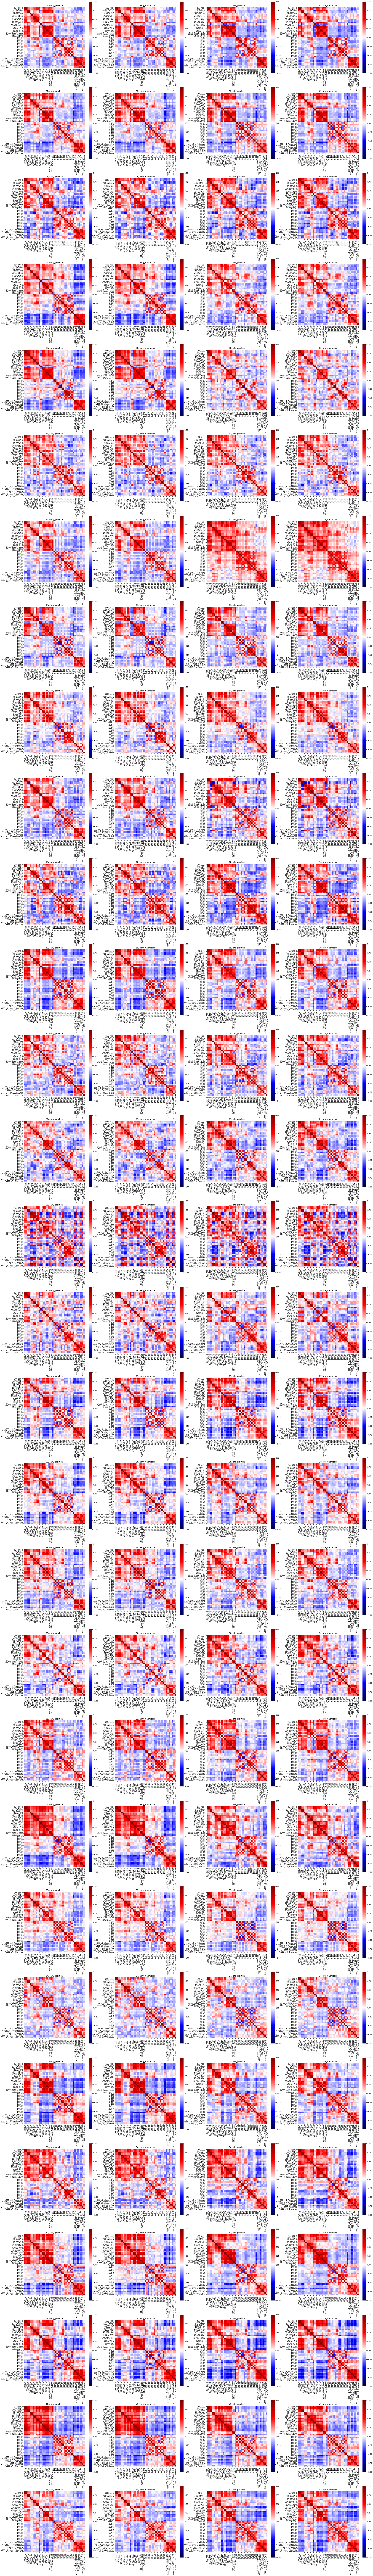

In [13]:
fig, axs = plt.subplots(nrows=len(subjs), ncols=len(stages), figsize=(len(stages)*10, len(subjs)*10))
if len(axs.shape)!=1:
    axs = np.concatenate(axs)

corrmats = {}
for i, (subj, stage) in enumerate(tqdm(list_)):
    corrmat = GA.make_df_correlation_matrix(subj, stage=stage, group=group)
    ## plot matrices by an individual subject
    ax = sns.heatmap(corrmat
                     , square=True, cmap='seismic', cbar=True
                     , robust=True
                     , vmin=-1., vmax=1.
                     , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axs[i])
    ax.set_title('%s, %s'%(subj, stage))
    if i<len(stages):
        corrmats[stage] = corrmat
    else:
        corrmats[stage] += corrmat        

In [15]:
fig.savefig(fname=join(GA.dir_git,'GA/images/%s.individual_connectivity_matrices.MO.png'%GA.today))

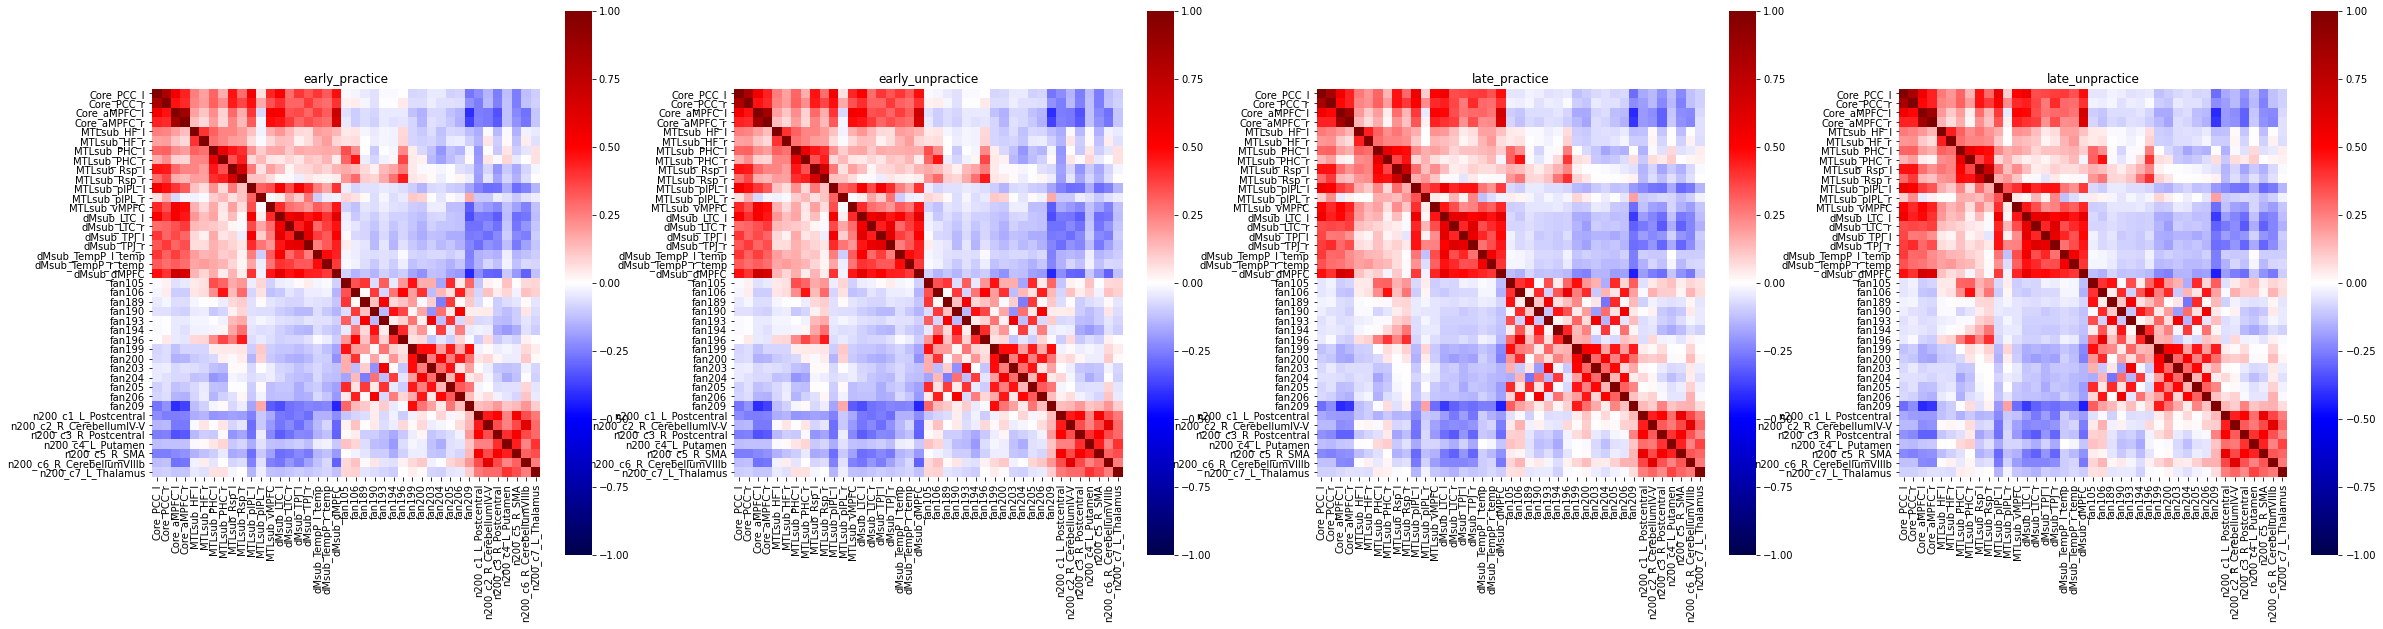

In [14]:
## divide by a number of subjects to obtain the average value
for stage in GA.list_stage:
    for roiA in sorted_rois:
        for roiB in sorted_rois:
            corrmats[stage].loc[roiA,roiB] /= len(subjs)

## plot group results
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
for i, stage in enumerate(GA.list_stage):
    ax = sns.heatmap(corrmats[stage]
                     , square=True, cmap='seismic', cbar=True
    #                  , robust=True
                     , vmin=-1., vmax=1.
                     , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axs[i])
    ax.set_title('%s'%stage)        

In [15]:
fig.savefig(fname=join(GA.dir_git,'GA/images/%s.group_connectivity_matrices.MO.png'%GA.today))

## 5. Correlation between the change in the visual-DMN core integration and improvement in success rate

In [56]:
def convert_key_into_regions(rois, key):
    (g1,g2) = key
    a, b = list(rois.keys())[g1-1], list(rois.keys())[g2-1]
    return a, b

In [57]:
def plot_interaction(X, Y, key, ax):
    ax = sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False, ax=ax)
    a, b = convert_key_into_regions(rois=rois_, key=key)
    ax.set_ylabel('Reward GB-GA')
    ax.set_xlabel('%s_%s GB-GA'%(a,b))
    ax.set_title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0., 0.8)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.25)

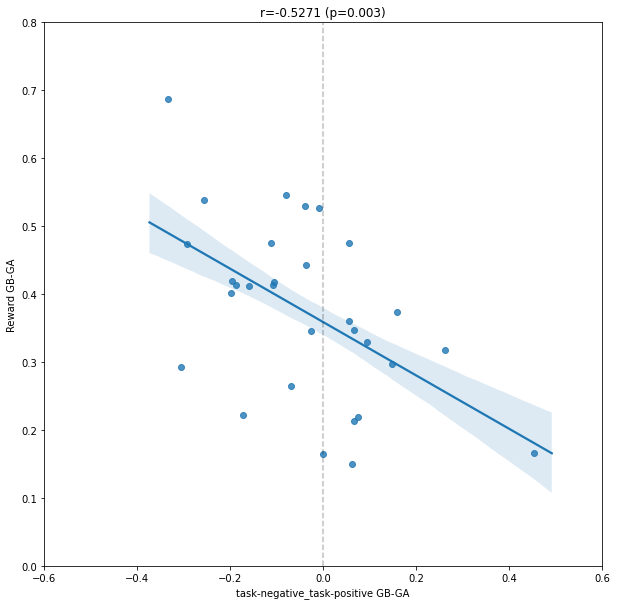

In [51]:
Y = GA.del_RewardRate

ncol = len(res.keys())
fig, axes = plt.subplots(nrows=1, ncols=ncol, figsize=(10*ncol,10))
for i, (key, X) in enumerate(res.items()):
    ax = axes[i] if ncol>1 else axes
    plot_interaction(X, Y, key=key, ax=ax)

fig.savefig(fname=join(GA.dir_git, 'GA/images/%s.task-negative_positive.png'%GA.today))

In [76]:
df = pd.DataFrame(columns=['subj', 'stage', 'groupA', 'groupB', 'int_str'])
for i, ((subj, stage, a, b), val) in enumerate(tmp.items()):
    df.loc[i,'subj'] = subj
    df.loc[i,'stage'] = stage
    df.loc[i,'groupA'] = a
    df.loc[i,'groupB'] = b
    df.loc[i,'int_str'] = val
df

subj           stage groupA groupB   int_str
0     01  early_practice      1      2  0.812604
1     01   late_practice      1      2  0.691859
2     01  early_practice      1      3  0.717791
3     01   late_practice      1      3  0.631988
4     01  early_practice      2      3    0.8289
..   ...             ...    ...    ...       ...
175   44   late_practice      1      2   0.55186
176   44  early_practice      1      3  0.369635
177   44   late_practice      1      3  0.420248
178   44  early_practice      2      3  0.670334
179   44   late_practice      2      3  0.693739

[180 rows x 5 columns]

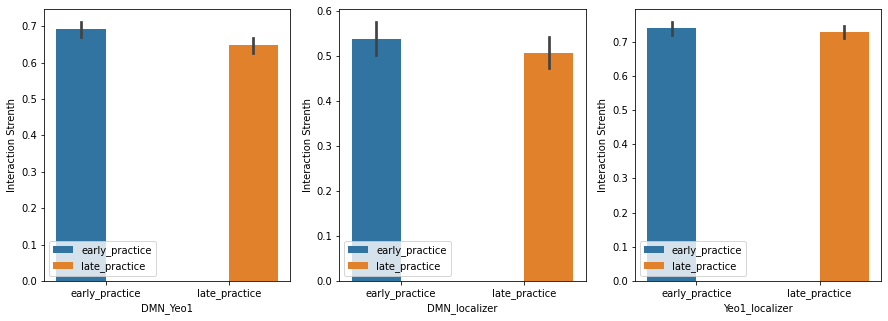

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, (a, b) in enumerate(res.keys()):
    ax = sns.barplot(x='stage', y='int_str', hue='stage'
                     , data=df[(df.groupA==a) & (df.groupB==b)]
                     , ax=axs[i], ci=GA.sig1*100)
    p, q = convert_key_into_regions(rois_, (a,b))
    ax.set(xlabel="%s_%s"%(p,q), ylabel="Interaction Strenth")
    ax.legend(loc='best')

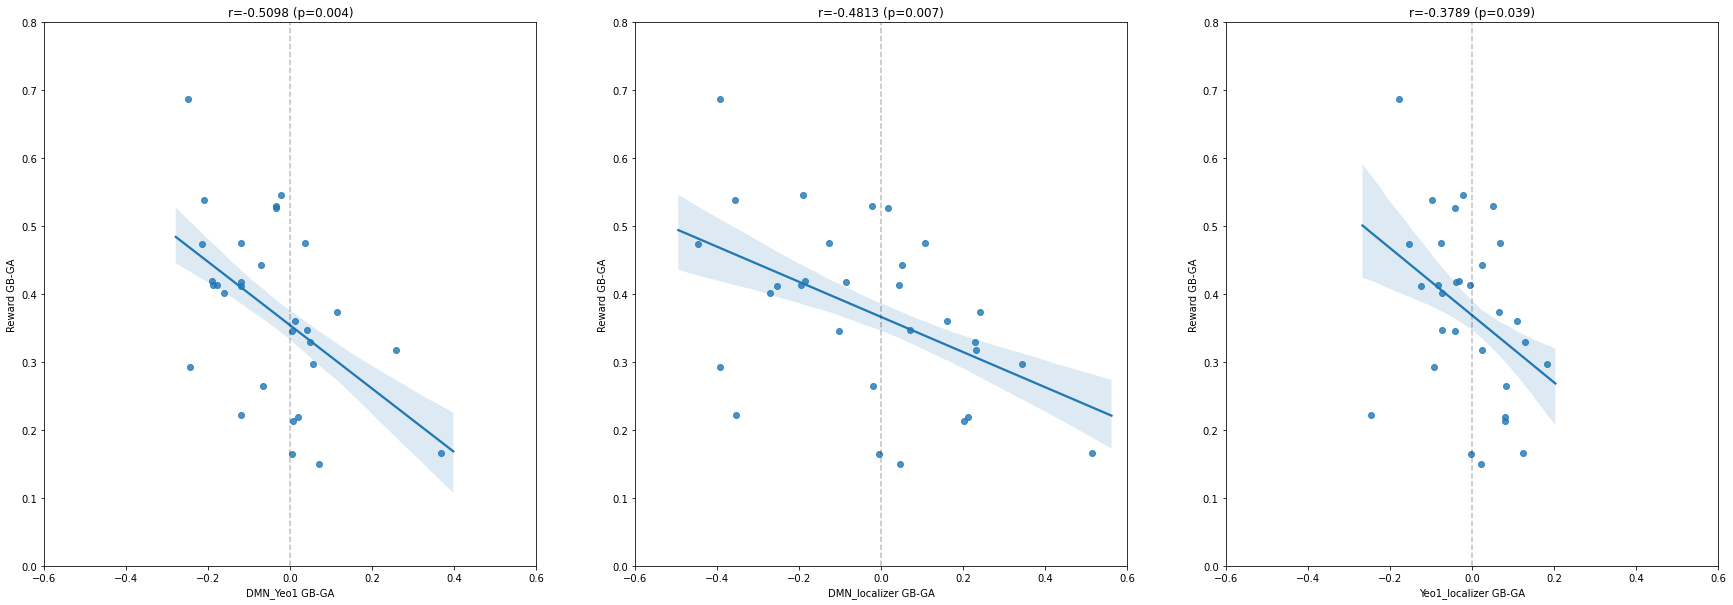

In [58]:
Y = GA.del_RewardRate

ncol = len(res.keys())
fig, axes = plt.subplots(nrows=1, ncols=ncol, figsize=(10*ncol,10))
for i, (key, X) in enumerate(res.items()):
    ax = axes[i] if ncol>1 else axes
    plot_interaction(X, Y, key=key, ax=axes[i])

fig.savefig(fname=join(GA.dir_git, 'GA/images/%s.DMN_Yeo17_Localizer.png'%GA.today))

In [39]:
## Lower-Tailed t-Test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.ttest_1samp(X, popmean=0, alternative='less'))

task-negative_task-positive:  Ttest_1sampResult(statistic=-1.2413244417812637, pvalue=0.1122165972161072)


In [40]:
## Spearman correlation
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.spearmanr(X,Y))

task-negative_task-positive:  SpearmanrResult(correlation=-0.5101223581757508, pvalue=0.003977862072292743)


In [41]:
## wilcoxon signed rank test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s_%s: '%(a,b), scipy.stats.wilcoxon(X))

task-negative_task-positive:  WilcoxonResult(statistic=160.0, pvalue=0.13590778549641166)


---

### Previous works

In [15]:
X = res
Y = GA.del_RewardRate

- replication of diagonal 2.

Text(0.5, 1.0, 'r=-0.5594 (p=0.001)')

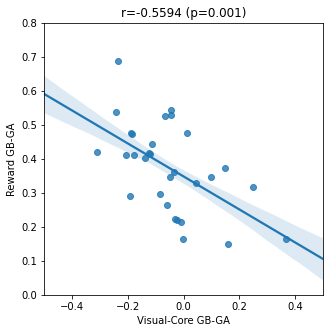

In [15]:
# fig = plt.figure(figsize=(5, 5))
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0., 0.8)
# sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
# plt.ylabel('Reward GB-GA')
# plt.xlabel('Visual-Core GB-GA')
# plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [16]:
# ## Lower-Tailed t-Test
# scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.9650511664948784, pvalue=0.029526146162293616)

- replication of diagonal 1.

Text(0.5, 1.0, 'r=-0.5493 (p=0.002)')

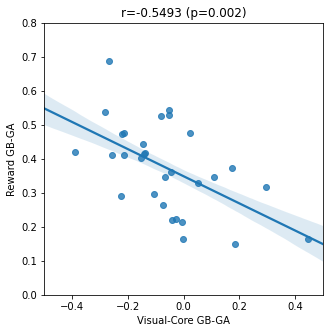

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [10]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.952815303503796, pvalue=0.030276459976303245)

In [11]:
scipy.stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.5692992213570635, pvalue=0.0010258884981883543)

In [12]:
scipy.stats.wilcoxon(X)

WilcoxonResult(statistic=122.0, pvalue=0.023038144695472357)

- replication of diagonal 0.

Text(0.5, 1.0, 'r=-0.5272 (p=0.003)')

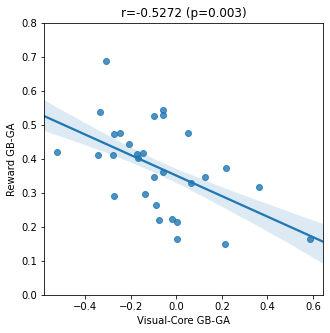

In [12]:
# fig = plt.figure(figsize=(5, 5))
# # plt.xlim(-0.5, 0.5)
# plt.ylim(-0., 0.8)
# sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
# plt.ylabel('Reward GB-GA')
# plt.xlabel('Visual-Core GB-GA')
# plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [11]:
# ## Lower-Tailed t-Test
# scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.8848507537598362, pvalue=0.034753651181442746)

### Partial Correlation by training_day

In [19]:
with open(join(GA.dir_behav,'training_day_n30.1D'),'r') as fr:
    Z = np.genfromtxt(fr, delimiter='\n')

In [26]:
Z_unit = Z/np.linalg.norm(Z)

In [27]:
X_ortho = X - np.matmul(np.outer(Z_unit,Z_unit),X)
Y_ortho = Y - np.matmul(np.outer(Z_unit,Z_unit),Y)

In [ ]:
## regress global activity out

Text(0.5, 1.0, 'r=-0.4123 (p=0.024)')

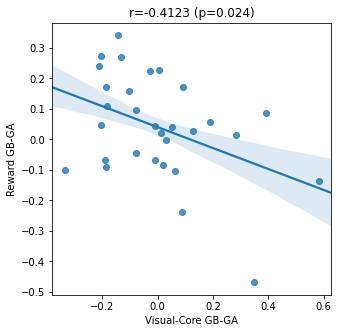

In [17]:
## 1st-order partial of the replication 0.5
X=X_ortho
Y=Y_ortho

fig = plt.figure(figsize=(5, 5))
sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))